In [161]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

df = pd.read_csv('C:/Local/python-training/Day-10/customers.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [162]:
# Dont need ID for clustering

df = df.drop(columns=['ID'])
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [163]:
specialchar_pattern = r'[@$#. \t?^&]'
num_pattern = r'[0-9]'

print(df.shape)
#remove data with special char
df = df[~df.apply(lambda x:x.str.contains(specialchar_pattern).any(), axis=1)]
print(df.shape)
df

(2627, 9)
(2627, 9)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [164]:
df.isna().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [165]:
# If the missing value ratio is >=0.3 delete the column
columns_to_drop = [col for col in df.columns if df[col].isna().sum()/len(df) >= 0.3]
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)
df

[]


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [166]:
print(df.shape)
#remove data with missing rows
df.dropna(inplace=True)
print(df.shape)
df

(2627, 9)
(2154, 9)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2621,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [167]:
df['Var_1'].unique()

array(['Cat_6', 'Cat_4', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5', 'Cat_7'],
      dtype=object)

In [168]:
# 7. Convert catagorical dependent variable to numbers
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['Var_1'] = label_encoder.fit_transform(df['Var_1'])
df


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,5
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,5
3,Male,Yes,59,No,Executive,11.0,High,2.0,5
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,3
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,5
...,...,...,...,...,...,...,...,...,...
2621,Female,No,35,Yes,Entertainment,1.0,Low,2.0,5
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,5
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,5
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,3


In [169]:
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1                int32
dtype: object

In [170]:
#Calculate outliers based on only 3 columns

new_df = df[['Age', 'Work_Experience', 'Family_Size']]
means = new_df.mean()
stddevs = new_df.std()

# How many sigmas
sd_limit=3

# distance of data from mean
diff = (new_df-means)

# Find the indices of outliers in each column
outlier_indices = (diff.abs() > sd_limit*stddevs).any(axis=1)

# Filter the DataFrame to get rows with outliers
outliers = df[outlier_indices]

outliers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
182,Female,No,49,Yes,Homemaker,13.0,Low,1.0,5
188,Female,Yes,37,Yes,Artist,13.0,Low,2.0,5
297,Male,No,38,Yes,Artist,13.0,Low,1.0,6
308,Male,No,30,No,Entertainment,5.0,Low,9.0,2
371,Male,No,33,No,Entertainment,13.0,Low,1.0,5
402,Male,No,27,No,Healthcare,14.0,Low,4.0,5
403,Female,No,35,No,Doctor,14.0,Low,6.0,6
412,Female,No,32,No,Entertainment,13.0,Low,5.0,6
432,Female,No,43,Yes,Artist,14.0,Low,2.0,5
574,Male,No,26,Yes,Doctor,0.0,Low,9.0,3


In [171]:
# Drop outliers
df = df[~outlier_indices]
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,5
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,5
3,Male,Yes,59,No,Executive,11.0,High,2.0,5
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,3
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,5
...,...,...,...,...,...,...,...,...,...
2621,Female,No,35,Yes,Entertainment,1.0,Low,2.0,5
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,5
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,5
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,3


In [172]:
# 12. Find the variance of each column, if var<0.1 then delete the column
new_df = df[['Age', 'Work_Experience', 'Family_Size']]
vars = new_df.var()
vars

columns_to_drop = [col for col in new_df.columns if new_df[col].var() < 0.1]
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)
df

# No cols with less var

[]


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,5
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,5
3,Male,Yes,59,No,Executive,11.0,High,2.0,5
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,3
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,5
...,...,...,...,...,...,...,...,...,...
2621,Female,No,35,Yes,Entertainment,1.0,Low,2.0,5
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,5
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,5
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,3


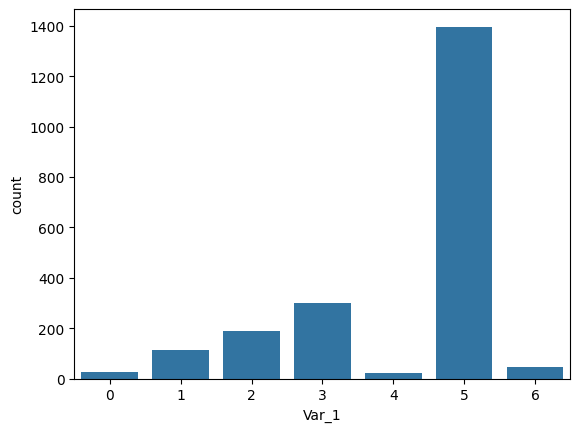

In [173]:
sns.countplot(df,x='Var_1')
plt.show()

In [174]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

print('Categorical columns :',cat_col)

# Numerical columns

num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Numerical columns :',num_col)

for col in [col for col in df.columns if df[col].dtype == 'object']:
    df[col] = df[col].astype('category')
    df[col] = df[col].astype('category').cat.codes
    df[col] = df[col].astype(int)
    
df

Categorical columns : ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']
Numerical columns : ['Age', 'Work_Experience', 'Family_Size', 'Var_1']


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
3,1,1,59,0,4,11.0,1,2.0,5
5,1,1,47,1,1,0.0,1,5.0,3
6,1,1,61,1,1,5.0,2,3.0,5
...,...,...,...,...,...,...,...,...,...
2621,0,0,35,1,3,1.0,2,2.0,5
2622,1,0,29,0,5,9.0,2,4.0,5
2623,0,0,35,1,1,1.0,2,1.0,5
2625,1,1,47,1,4,1.0,1,5.0,3


In [175]:
from sklearn.cluster import KMeans
WSS = []
for i in range(1,12):
    m = KMeans(n_clusters=i)
    m = m.fit(df)
    WSS.append(m.inertia_)

c:\Users\SESA509164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SESA509164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SESA509164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\SESA509164\AppData\Local\Programs\Python\Python311\Lib\site-p

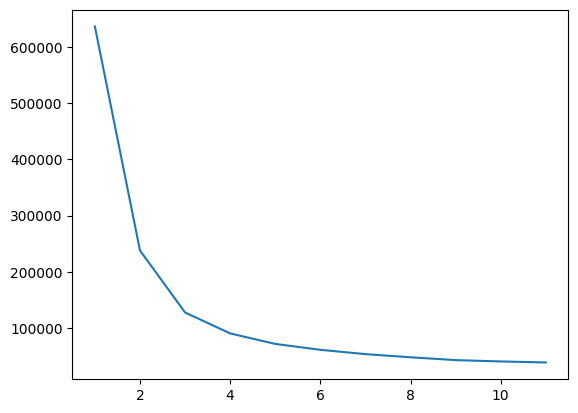

In [176]:
import matplotlib.pyplot as plt
x = list(range(1,12))
plt.plot(x,WSS,"-")

In [177]:
from sklearn.metrics import silhouette_samples, silhouette_score
for i in range(2,9):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df)
    label=km.labels_
    print(silhouette_score(x_scaled, label, random_state=1))

c:\Users\SESA509164\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NameError: name 'x_scaled' is not defined